# ADA boosting

In [1]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.DataFrame()

In [3]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['lable'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,X1,X2,lable
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

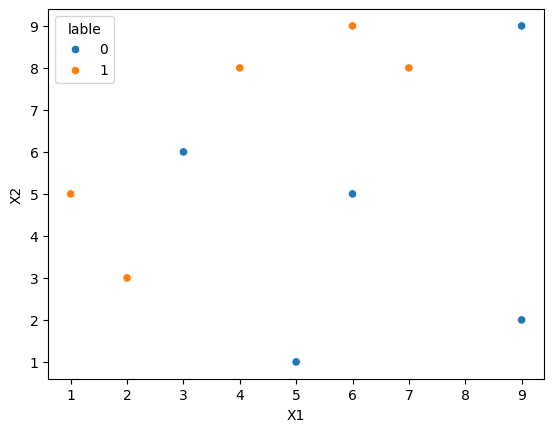

In [5]:
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['lable'] )

In [6]:
df.shape

(10, 3)

In [7]:
df.shape[0] # number of rows

10

In [8]:
df.shape[1] # number of columns

3

In [9]:
1/df.shape[0]

0.1

In [10]:
df['sample_weight'] = 1/df.shape[0]

In [11]:
df

,X1,X2,lable,sample_weight
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [12]:
dt1 =  DecisionTreeClassifier(max_depth=1)

In [13]:
x = df.iloc[:,0:2]

In [14]:
x

,X1,X2
0,1,5
1,2,3
2,3,6
3,4,8
4,5,1
5,6,9
6,6,5
7,7,8
8,9,9
9,9,2


In [15]:
y = df.iloc[:,2]

In [16]:
y

0    1
1    1
2    0
3    1
4    0
5    1
6    0
7    1
8    0
9    0
Name: lable, dtype: int64

In [17]:
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

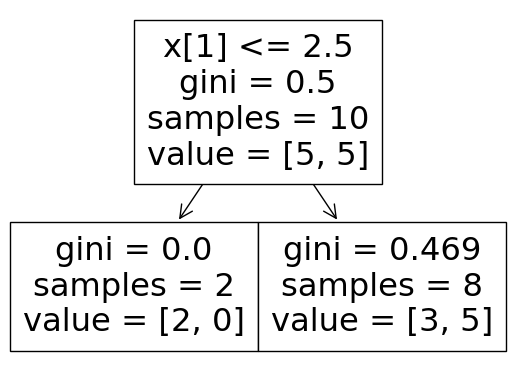

In [18]:
 plot_tree(dt1)

In [20]:
np.array(x)

array([[1, 5],
       [2, 3],
       [3, 6],
       [4, 8],
       [5, 1],
       [6, 9],
       [6, 5],
       [7, 8],
       [9, 9],
       [9, 2]], dtype=int64)

c:\Users\gadha\anaconda3\envs\ids\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

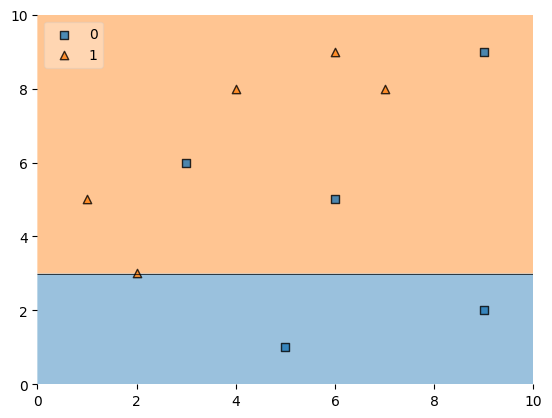

In [22]:
plot_decision_regions(np.array(x),np.array(y),clf=dt1,legend=2)

Here we can see that the in upper resion yellow there are 3 blue point are ther which are miss classified

In [28]:
df['y_pred']=dt1.predict(x)

In [30]:
df   

,X1,X2,lable,sample_weight,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


now we have create a cloumn of prediction and we can compare the lable column and y_pred and i dentify miss classification as we can see that the graph has 3 miss classifictaion point and also in table we can see that